In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/animes_data.csv")

In [4]:
df.head()

,anime_id,title,main_picture,ja_title,synopsis,genres,media,episodes,rating,members,start_date,season,source,studios
0,1,Cowboy Bebop,https://api-cdn.myanimelist.net/images/anime/4...,カウボーイビバップ,"Crime is timeless. By the year 2071, humanity ...","Action,Adult Cast,Award Winning,Sci-Fi,Space",tv,26,8.75,1763887,1998-04-03,spring_1998,original,Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,https://api-cdn.myanimelist.net/images/anime/1...,カウボーイビバップ 天国の扉,"Another day, another bounty—such is the life o...","Action,Adult Cast,Sci-Fi,Space",movie,1,8.38,359625,2001-09-01,summer_2001,original,Bones
2,6,Trigun,https://api-cdn.myanimelist.net/images/anime/7...,トライガン,"Vash the Stampede is the man with a $$60,000,0...","Action,Adult Cast,Adventure,Sci-Fi,Shounen",tv,26,8.22,723953,1998-04-01,spring_1998,manga,Madhouse
3,7,Witch Hunter Robin,https://api-cdn.myanimelist.net/images/anime/1...,Witch Hunter ROBIN (ウイッチハンターロビン),Robin Sena is a powerful craft user drafted in...,"Action,Detective,Drama,Mystery,Supernatural",tv,26,7.25,111598,2002-07-03,summer_2002,original,Sunrise
4,15,Eyeshield 21,https://api-cdn.myanimelist.net/images/anime/1...,アイシールド21,"Shy, reserved, and small-statured, Deimon High...","Shounen,Sports,Team Sports",tv,145,7.92,177215,2005-04-06,spring_2005,manga,Gallop


In [5]:
# animeの基本統計量の確認
round(df.describe(),2)

,anime_id,episodes,rating,members
count,4973.00,4973.00,4973.00,4973.00
mean,21118.80,13.65,7.17,175458.22
std,16579.97,34.09,0.73,312870.28
min,1.00,0.00,1.84,15020.00
25%,4066.00,1.00,6.74,30017.00
50%,19671.00,12.00,7.22,65167.00
75%,36144.00,13.00,7.63,176996.00
max,54591.00,1787.00,9.10,3729377.00


In [6]:
# 欠損データの確認
df.isnull().sum()

anime_id         0
title            0
main_picture     0
ja_title         0
synopsis        12
genres           0
media            0
episodes         0
rating           0
members          0
start_date       0
season           0
source          50
studios         33
dtype: int64

In [9]:
rate = df["rating"].tolist()

(array([1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        5.000e+00, 1.400e+01, 6.000e+00, 5.700e+01, 1.080e+02, 1.970e+02,
        4.670e+02, 8.110e+02, 1.042e+03, 1.051e+03, 6.440e+02, 3.690e+02,
        1.500e+02, 4.200e+01]),
 array([1.84 , 2.203, 2.566, 2.929, 3.292, 3.655, 4.018, 4.381, 4.744,
        5.107, 5.47 , 5.833, 6.196, 6.559, 6.922, 7.285, 7.648, 8.011,
        8.374, 8.737, 9.1  ]),
 <BarContainer object of 20 artists>)

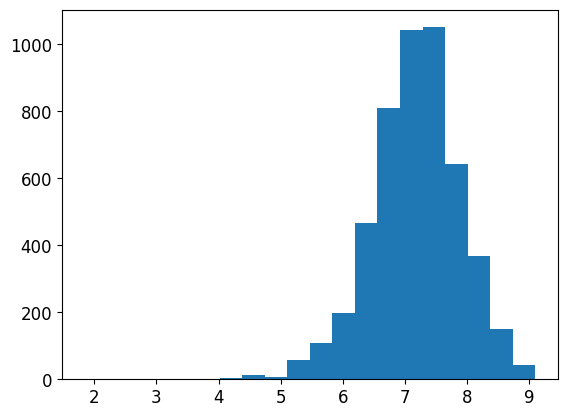

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] =12
plt.hist(rate, bins=20)

In [11]:
# ジャンル辞書を作成
genre_dict = {}
for i in range(len(df)):
    genres = df["genres"].iloc[i].split(",")
    for j in genres:
        try:
            genre_dict[j]+=1
        except Exception as e:
            genre_dict.setdefault(j, 1)

In [12]:
# メディア辞書を作成
media_dict = {}
for i in range(len(df)):
    media = df["media"].iloc[i].split(",")
    for j in media:
        try:
            media_dict[j]+=1
        except Exception as e:
            media_dict.setdefault(j, 1)

<BarContainer object of 76 artists>

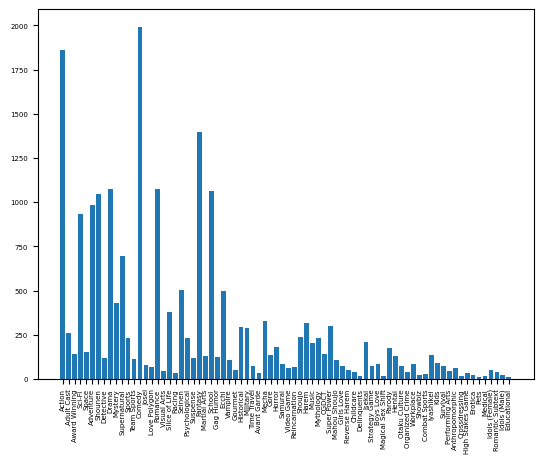

In [14]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

plt.rcParams["font.size"] =5
x = genre_dict.keys()
y = genre_dict.values()
plt.xticks(rotation=90)
plt.bar(x,y)
#matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
#plt.savefig("genre.png")

In [15]:
df.sort_values('members', ascending= False)[20:30]

,anime_id,title,main_picture,ja_title,synopsis,genres,media,episodes,rating,members,start_date,season,source,studios
825,1575,Code Geass: Hangyaku no Lelouch,https://api-cdn.myanimelist.net/images/anime/1...,コードギアス 反逆のルルーシュ,"In the year 2010, the Holy Empire of Britannia...","Action,Award Winning,Drama,Mecha,Military,Scho...",tv,25,8.70,2143867,2006-10-06,fall_2006,original,Sunrise
1267,4224,Toradora!,https://cdn.myanimelist.net/images/anime/13/22...,とらドラ！,Ryuuji Takasu is a gentle high school student ...,"Drama,Love Polygon,Romance,School",tv,25,8.08,2114425,2008-10-02,fall_2008,light_novel,J.C.Staff
2679,23273,Shigatsu wa Kimi no Uso,https://cdn.myanimelist.net/images/anime/3/671...,四月は君の嘘,"Kousei Arima is a child prodigy known as the ""...","Drama,Love Polygon,Music,Romance,School,Shounen",tv,22,8.65,2103457,2014-10-10,fall_2014,manga,A-1 Pictures
4093,38524,Shingeki no Kyojin Season 3 Part 2,https://cdn.myanimelist.net/images/anime/1517/...,進撃の巨人 Season3 Part.2,Seeking to restore humanity's diminishing hope...,"Action,Drama,Gore,Military,Shounen,Survival",tv,10,9.06,2090913,2019-04-29,spring_2019,manga,Wit Studio
3066,31240,Re:Zero kara Hajimeru Isekai Seikatsu,https://cdn.myanimelist.net/images/anime/1522/...,Re：ゼロから始める異世界生活,When Subaru Natsuki leaves the convenience sto...,"Drama,Fantasy,Isekai,Psychological,Suspense,Ti...",tv,25,8.24,2083501,2016-04-04,spring_2016,light_novel,White Fox
3757,36456,Boku no Hero Academia 3rd Season,https://cdn.myanimelist.net/images/anime/1319/...,僕のヒーローアカデミア,As summer arrives for the students at UA Acade...,"Action,School,Shounen,Super Power",tv,25,8.04,2077012,2018-04-07,spring_2018,manga,Bones
2517,20507,Noragami,https://cdn.myanimelist.net/images/anime/1886/...,ノラガミ,"In times of need, if you look in the right pla...","Action,Fantasy,Mythology,Shounen",tv,12,7.95,2072202,2014-01-05,winter_2014,manga,Bones
1497,6547,Angel Beats!,https://cdn.myanimelist.net/images/anime/1244/...,Angel Beats!（エンジェルビーツ!）,Death is one of many mysteries that has left h...,"Drama,School,Supernatural",tv,13,8.06,2005197,2010-04-03,spring_2010,original,P.A. Works
2630,22199,Akame ga Kill!,https://api-cdn.myanimelist.net/images/anime/1...,アカメが斬る！,Night Raid is the covert assassination branch ...,"Action,Fantasy,Gore,Shounen,Super Power",tv,24,7.47,1990472,2014-07-07,summer_2014,manga,White Fox
3041,31043,Boku dake ga Inai Machi,https://cdn.myanimelist.net/images/anime/10/77...,僕だけがいない街,"When tragedy is about to strike, Satoru Fujinu...","Mystery,Psychological,Seinen,Supernatural,Susp...",tv,12,8.31,1985737,2016-01-08,winter_2016,manga,A-1 Pictures


In [16]:
df[df['genres'].str.contains('Comedy')].query("9.0 > rating > 8.0")

,anime_id,title,main_picture,ja_title,synopsis,genres,media,episodes,rating,members,start_date,season,source,studios
24,45,Rurouni Kenshin: Meiji Kenkaku Romantan,https://api-cdn.myanimelist.net/images/anime/1...,るろうに剣心 -明治剣客浪漫譚-,In the final years of the Bakumatsu era lived ...,"Action,Adventure,Comedy,Historical,Romance,Sam...",tv,94,8.29,475992,1996-01-10,winter_1996,manga,"Gallop,Studio Deen"
36,57,Beck,https://api-cdn.myanimelist.net/images/anime/1...,ベック,"Fourteen-year-old Yukio ""Koyuki"" Tanaka is a d...","Comedy,Drama,Music,Shounen,Slice of Life",tv,26,8.29,325655,2004-10-07,fall_2004,manga,Madhouse
49,72,Full Metal Panic? Fumoffu,https://api-cdn.myanimelist.net/images/anime/4...,フルメタル・パニック? ふもっふ,Sergeant Sousuke Sagara returns to Jindai High...,"Action,Comedy,Gag Humor,School",tv,12,8.03,288492,2003-08-26,summer_2003,light_novel,Kyoto Animation
104,135,Hikaru no Go,https://api-cdn.myanimelist.net/images/anime/1...,ヒカルの碁,While searching through his grandfather's atti...,"Comedy,Drama,School,Shounen,Strategy Game,Supe...",tv,75,8.08,133220,2001-10-10,fall_2001,manga,Pierrot
163,205,Samurai Champloo,https://api-cdn.myanimelist.net/images/anime/1...,サムライチャンプルー,Fuu Kasumi is a young and clumsy waitress who ...,"Action,Adventure,Comedy,Historical,Samurai",tv,26,8.51,1182832,2004-05-20,spring_2004,original,Manglobe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,50612,Dr. Stone: Ryuusui,https://cdn.myanimelist.net/images/anime/1071/...,Dr.STONE 龍水,"Now that brains and brawns have united forces,...","Adventure,Comedy,Sci-Fi,Shounen,Time Travel",special,1,8.26,215992,2022-07-10,summer_2022,manga,TMS Entertainment
4857,50631,"Komi-san wa, Comyushou desu. 2nd Season",https://cdn.myanimelist.net/images/anime/1108/...,古見さんは、コミュ症です。 2,After an exciting and momentous cultural festi...,"Comedy,Romantic Subtext,School,Shounen",tv,12,8.08,427241,2022-04-07,spring_2022,manga,OLM
4930,52198,Kaguya-sama wa Kokurasetai: First Kiss wa Owar...,https://cdn.myanimelist.net/images/anime/1670/...,かぐや様は告らせたい -ファーストキッスは終わらない-,"After their first kiss, Kaguya Shinomiya and M...","Comedy,Drama,Romance,School,Seinen",movie,1,8.89,171145,2022-12-17,fall_2022,manga,A-1 Pictures
4947,52865,Romantic Killer,https://cdn.myanimelist.net/images/anime/1676/...,ロマンティック・キラー,Anzu Hoshino needs only three things in her li...,"Comedy,Parody,Reverse Harem,Romance,Shounen,Su...",ona,12,8.08,150221,2022-10-27,fall_2022,manga,domerica
